# Logistic Regression

**Logistic regression** is the appropriate regression analysis to conduct when the dependent variable is binary. Like all regression analyses, the logistic regression is a predictive analysis. 

Logistic regression is used to describe data and to explain the relationship between one dependent binary variable and one or more independent variables.

Logistic Regression is used when the dependent variable (target) is categorical.

**For example:**

* To predict whether an email is spam (1) or (0).
* Whether online transaction is fraudulent (1) or not (0).
* Whether the tumor is malignant (1) or not (0).

**In other words the dependant variable (output) for logistic regression model may be described as:**

Logistic Regression Output:


# Problem Statement

## 1. Importing Libraries and Collecting Data

In [1]:
#  Importing libraries for exploratory Data Analysis

import pandas as pd
import numpy as np

#  Importing libraries for Data Visualization

import matplotlib.pyplot as plt
import seaborn as sb
%matplotlib inline

In [2]:
#  importing Data 
cars = pd.read_csv("cars.csv")

## 2. Analyzing Data

In [3]:
#Observing Top 5 Rows
cars.head()

,Model,MPG,Cylinder,Disp,HP,Drat,Wt,Qsec,VS,AM,Gear,Carb
0,Mazda RX4,21.0,6,160.0,110,3.90,2.620,16.46,0,1,4,4
1,Mazda RX4 Wag,21.0,6,160.0,110,3.90,2.875,17.02,0,1,4,4
2,Datsun 710,22.8,4,108.0,93,3.85,2.320,18.61,1,1,4,1
3,Hornet 4 Drive,21.4,6,258.0,110,3.08,3.215,19.44,1,0,3,1
4,Hornet Sportabout,18.7,8,360.0,175,3.15,3.440,17.02,0,0,3,2


In [4]:
#checking data set shape
print(cars.shape)

(32, 12)


In [5]:
#Observing data type and null values for columns
cars.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 32 entries, 0 to 31
Data columns (total 12 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Model     32 non-null     object 
 1   MPG       32 non-null     float64
 2   Cylinder  32 non-null     int64  
 3   Disp      32 non-null     float64
 4   HP        32 non-null     int64  
 5   Drat      32 non-null     float64
 6   Wt        32 non-null     float64
 7   Qsec      32 non-null     float64
 8   VS        32 non-null     int64  
 9   AM        32 non-null     int64  
 10  Gear      32 non-null     int64  
 11  Carb      32 non-null     int64  
dtypes: float64(5), int64(6), object(1)
memory usage: 3.1+ KB


In [6]:
cars.describe()

,MPG,Cylinder,Disp,HP,Drat,Wt,Qsec,VS,AM,Gear,Carb
count,32.000000,32.000000,32.000000,32.000000,32.000000,32.000000,32.000000,32.000000,32.000000,32.000000,32.0000
mean,20.090625,6.187500,230.403125,147.531250,3.596563,3.217250,17.848750,0.437500,0.406250,3.687500,2.8125
std,6.026948,1.785922,123.788090,70.012434,0.534679,0.978457,1.786943,0.504016,0.498991,0.737804,1.6152
min,10.400000,4.000000,71.100000,52.000000,2.760000,1.513000,14.500000,0.000000,0.000000,3.000000,1.0000
25%,15.425000,4.000000,120.825000,96.500000,3.080000,2.581250,16.892500,0.000000,0.000000,3.000000,2.0000
50%,19.200000,6.000000,197.000000,118.000000,3.695000,3.325000,17.710000,0.000000,0.000000,4.000000,2.0000
75%,22.800000,8.000000,326.000000,201.250000,3.920000,3.610000,18.900000,1.000000,1.000000,4.000000,4.0000
max,33.900000,8.000000,472.000000,335.000000,4.930000,5.424000,22.900000,1.000000,1.000000,5.000000,8.0000


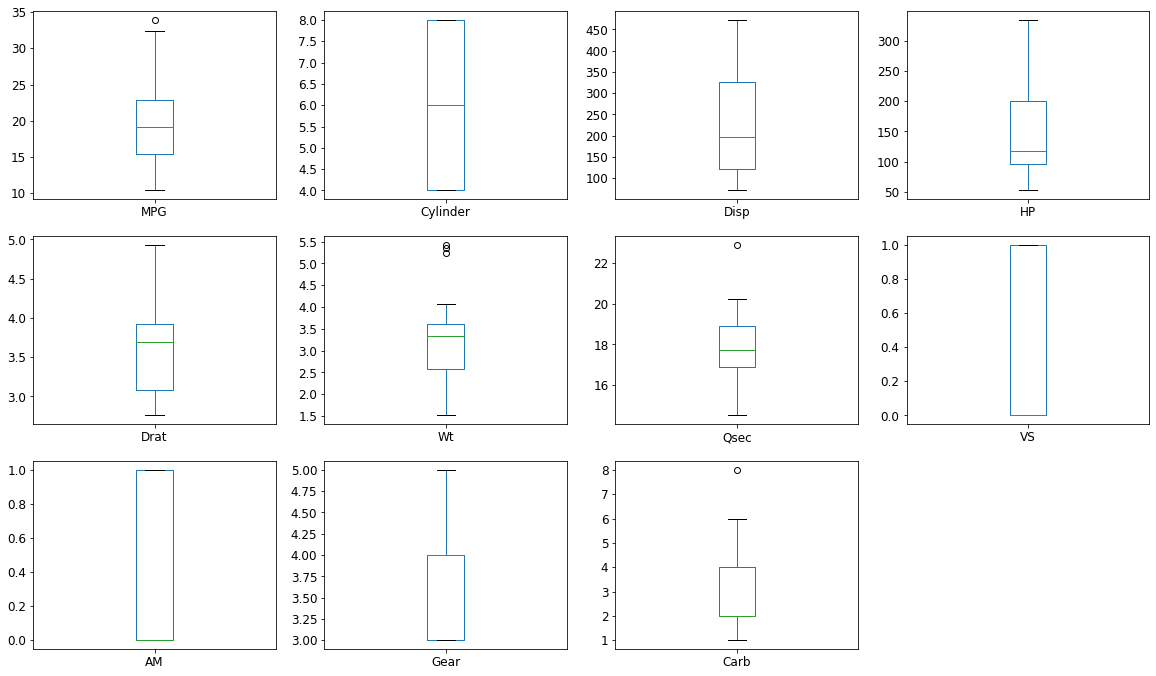

In [7]:
#Plotting Box plot to observe outliers
cars.plot(kind='box', subplots=True, layout=(5,4) ,fontsize=12, figsize=(20,20))
plt.show()

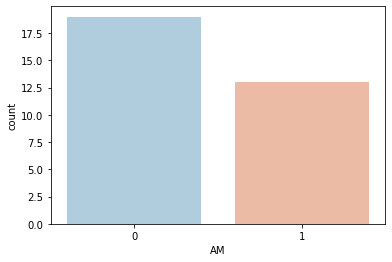

In [8]:
sb.countplot(x='AM',data=cars,palette='RdBu_r')
plt.show()

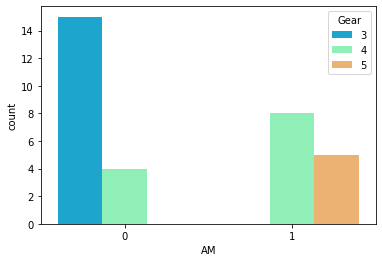

In [9]:
sb.countplot(x='AM',hue='Gear',data=cars,palette='rainbow')

In [10]:
cars.corr()

,MPG,Cylinder,Disp,HP,Drat,Wt,Qsec,VS,AM,Gear,Carb
MPG,1.000000,-0.852162,-0.847011,-0.774015,0.681172,-0.867659,0.418684,0.664039,0.599832,0.480285,-0.550925
Cylinder,-0.852162,1.000000,0.900024,0.839705,-0.699938,0.782496,-0.591242,-0.810812,-0.522607,-0.492687,0.526988
Disp,-0.847011,0.900024,1.000000,0.787226,-0.707880,0.887034,-0.433543,-0.708249,-0.589782,-0.553274,0.395375
HP,-0.774015,0.839705,0.787226,1.000000,-0.468566,0.655475,-0.696349,-0.739949,-0.248297,-0.149057,0.729171
Drat,0.681172,-0.699938,-0.707880,-0.468566,1.000000,-0.712441,0.091205,0.440278,0.712711,0.699610,-0.090790
Wt,-0.867659,0.782496,0.887034,0.655475,-0.712441,1.000000,-0.174716,-0.554916,-0.692495,-0.583287,0.427606
Qsec,0.418684,-0.591242,-0.433543,-0.696349,0.091205,-0.174716,1.000000,0.744535,-0.229861,-0.212682,-0.656249
VS,0.664039,-0.810812,-0.708249,-0.739949,0.440278,-0.554916,0.744535,1.000000,0.168345,0.206023,-0.569607
AM,0.599832,-0.522607,-0.589782,-0.248297,0.712711,-0.692495,-0.229861,0.168345,1.000000,0.794059,0.057534
Gear,0.480285,-0.492687,-0.553274,-0.149057,0.699610,-0.583287,-0.212682,0.206023,0.794059,1.000000,0.274073


# 3.Training & Testing Split

In [11]:
#car has  Automatic(1) or Manual(0) Gear System  - AM 

# Using predictor variables/ features/ independent variabes, x1, x2, x3,... => X
y = cars.AM
X = cars.loc[:,['MPG','HP','Wt']]

In [12]:
# training and testing model selection
from sklearn.model_selection import train_test_split

In [13]:
##Splitting Train and Test data
X_train,X_test,y_train,y_test = train_test_split(X,y, test_size=0.2,random_state=0)

In [14]:
# Importing machine learning algorithm
from sklearn.linear_model import LogisticRegression

In [15]:
model = LogisticRegression()

In [16]:
model.fit(X_train,y_train)

LogisticRegression()

In [17]:
y_predict = model.predict(X_test)

In [18]:
y_predict

array([0, 0, 0, 1, 0, 0, 1])

In [19]:
y_test

11    0
22    0
10    0
2     1
16    0
14    0
28    1
Name: AM, dtype: int64

# 4.Model Evaluation

In [20]:
# Model evaluation 
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score

In [21]:
# Accuracy score gives accuracy of the model
accuracy_score(y_test,y_predict)*100

100.0

In [22]:
print(classification_report(y_test,y_predict))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00         5
           1       1.00      1.00      1.00         2

    accuracy                           1.00         7
   macro avg       1.00      1.00      1.00         7
weighted avg       1.00      1.00      1.00         7



In [23]:
confusion_matrix(y_test,y_predict)

array([[5, 0],
       [0, 2]])

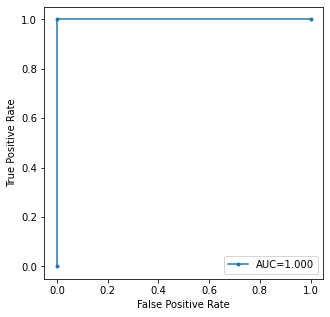

In [24]:
from sklearn.metrics import roc_curve,auc

fpr,tpr,threshold=roc_curve(y_test,y_predict)
auc_val=auc(fpr,tpr)

plt.figure(figsize=(5,5))
plt.plot(fpr,tpr,marker=".",label="AUC=%0.3f" % auc_val)
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.legend()
plt.show()